In [265]:
import numpy as np
import pandas as pd
import keras

df = pd.read_csv("clusters.csv", sep=';', encoding='utf-8').drop(columns = ['Unnamed: 0', 'index', 'Кластер'])
df['Маржа'] = df['Маржа'].astype(str)
df['Маржа'] = df['Маржа'].apply(lambda x: x.replace(',', '.'))
df['Маржа'] = df['Маржа'].apply(lambda x: x.replace(' ', ''))
df['Маржа'] = df['Маржа'].astype(float)
df['СуммаСтроки'] = df['СуммаСтроки'].astype(str)
df['СуммаСтроки'] = df['СуммаСтроки'].apply(lambda x: x.replace(',', '.'))
df['СуммаСтроки'] = df['СуммаСтроки'].apply(lambda x: x.replace(' ', ''))
df['СуммаСтроки'] = df['СуммаСтроки'].astype(float)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(str)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(',', '.'))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(' ', ''))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(float)
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].astype(str)
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].apply(lambda x: x.replace(',', '.'))
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].apply(lambda x: x.replace(' ', ''))
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].astype(float)
df['Цена'] = df['Цена'].astype(str)
df['Цена'] = df['Цена'].apply(lambda x: x.replace(',', '.'))
df['Цена'] = df['Цена'].apply(lambda x: x.replace(' ', ''))
df['Цена'] = df['Цена'].astype(float)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(str)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(',', '.'))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(' ', ''))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (29,30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [266]:
df.Дата = pd.to_datetime(df.Дата)

In [267]:
df_last = df.loc[df.Дата.dt.month == 10]
df_first = df.loc[df.Дата.dt.month != 10]

In [268]:
display = pd.DataFrame()
display['Id'] = df_first.drop_duplicates(subset='Телефон_new')['Телефон_new']
display = display.reset_index(drop=True)
df_first['МаржаПолная'] = df_first['Маржа'] * df_first['Количество']


<ipython-input-268-c804322df6f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['МаржаПолная'] = df_first['Маржа'] * df_first['Количество']


In [269]:
mean_non_dupe = df_first.drop_duplicates(subset='НомерЗаказаНаСайте').groupby('Телефон_new').mean()
unique = df_first.groupby('Телефон_new').nunique()
mean =  df_first.groupby('Телефон_new').mean()
sum = df_first.groupby('Телефон_new').sum()
non_dupe = df_first.drop_duplicates(subset='НомерЗаказаНаСайте')

In [270]:
mean_non_dupe

,СуммаЗаказаНаСайте,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,Маржа,НомерСтроки,КоличествоПроданоКлиенту,Доставка,МаржаПолная
Телефон_new,,,,,,,,,,,
32565748-535549565054 5,1587.0,1.0,399.0,399.0,257.40,10.0,141.60,2.0,1.0,0.0,141.60
49574954-56524849545119,5215.0,1.0,5166.0,5166.0,5870.86,8.0,-704.86,1.0,1.0,1.0,-704.86
55445748-51495749565771,799.0,1.0,799.0,799.0,753.15,10.0,45.85,1.0,1.0,0.0,45.85
55515349-57484951525673,1345.0,1.0,1345.0,1345.0,1531.00,8.0,-186.00,1.0,1.0,0.0,-186.00
55515749-50495648505172,21305.0,1.0,999.0,999.0,1284.00,8.0,-285.00,5.0,1.0,1.0,-285.00
...,...,...,...,...,...,...,...,...,...,...,...
57535051-57555156485395,498.0,1.0,399.0,399.0,335.66,8.0,63.34,1.0,1.0,1.0,63.34
57544955-51485756555597,39098.0,1.0,38999.0,38999.0,30000.00,10.0,8999.00,1.0,1.0,1.0,8999.00
57545355-53485748575799,3212.0,2.0,1606.0,3212.0,1442.61,7.0,326.78,1.0,2.0,0.0,653.56


In [271]:
df_bought = df_first[df_first.КоличествоПроданоКлиенту != 0]
df_bought['Итог'] = df_bought['Цена'] * df_bought['КоличествоПроданоКлиенту']
df_bought['МаржаПолнаяВыкупленная'] = df_bought['Маржа'] * df_bought['КоличествоПроданоКлиенту']

<ipython-input-271-6e43287edbe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['Итог'] = df_bought['Цена'] * df_bought['КоличествоПроданоКлиенту']
<ipython-input-271-6e43287edbe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['МаржаПолнаяВыкупленная'] = df_bought['Маржа'] * df_bought['КоличествоПроданоКлиенту']


In [272]:
mean_non_dupe_bought = df_bought.groupby(['Телефон_new', 'НомерЗаказаНаСайте']).sum()['Итог'].groupby('Телефон_new').mean()
unique_bought = df_bought.groupby('Телефон_new').nunique()
mean_bought =  df_bought.groupby('Телефон_new').mean()
sum_bought = df_bought.groupby('Телефон_new').sum()
group2 = df_bought.groupby(['Телефон_new', 'Группа2']).sum()
group3 = df_bought.groupby(['Телефон_new', 'Группа3']).sum()
type = df_bought.groupby(['Телефон_new', 'Тип']).sum()
self_carry =  df_bought[(df_bought['МетодДоставки'] == 'Самовывоз') | (df_bought['МетодДоставки'] == 'Pick point')].groupby('Телефон_new').sum()['КоличествоПроданоКлиенту'] / df_bought.groupby('Телефон_new').sum()['КоличествоПроданоКлиенту']

In [273]:
display = display.merge(unique['НомерЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'НомерЗаказаНаСайте':'КоличествоЧеков'})

In [274]:
display = display.merge(mean_non_dupe['СуммаЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'СуммаЗаказаНаСайте':'СреднийЧек'})

In [275]:
display = display.merge(mean['Количество'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'Количество':'СреднееЧислоТоваровЧека'})

In [276]:
display = display.merge(sum['СуммаСтроки'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'СуммаСтроки':'Выручка'})

In [277]:
display = display.merge(sum['Количество'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'Количество':'КоличествоТоваров'})

In [278]:
display = display.merge(mean['МаржаПолная'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'МаржаПолная':'СредняяМаржа'})

In [279]:
display = display.merge(unique_bought['НомерЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'НомерЗаказаНаСайте':'КоличествоЧековВыкупленные'})
display = display.fillna(0)

In [280]:
display = display.merge(mean_non_dupe_bought, left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'Итог':'СреднийЧекВыкупленные'})
display = display.fillna(0)

In [281]:
display = display.merge(mean['КоличествоПроданоКлиенту'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'СреднееЧислоТоваровЧекаВыкупленные'})
display = display.fillna(0)

In [282]:
display = display.merge(sum_bought['Итог'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'Итог':'ВыручкаВыкупленная'})
display = display.fillna(0)

In [283]:
display = display.merge(sum['КоличествоПроданоКлиенту'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'КоличествоТоваровВыкупленные'})
display = display.fillna(0)

In [284]:
display = display.merge(mean_bought['МаржаПолнаяВыкупленная'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'МаржаПолнаяВыкупленная':'СредняяМаржаВыкупленная'})
display = display.fillna(0)

In [285]:
display = display.merge(self_carry.to_frame().fillna(0), left_on='Id', right_index=True, how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'ДоляСамовывоза'})
display = display.fillna(0)

In [286]:
display = display[display.КоличествоТоваровВыкупленные != 0]

In [287]:
display['ДоляВыкупленных'] = display['КоличествоТоваровВыкупленные'] / display['КоличествоТоваров']

In [288]:
for i in df.Тип.unique():
    display[i] = i
    display = display.merge(type['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Тип'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

In [289]:
for i in df.Группа2.unique():
    display[i] = i
    display = display.merge(group2['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Группа2'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

In [290]:
for i in df.Группа3.unique():
    display[i] = i
    display = display.merge(group3['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Группа3'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

In [291]:
display = display.merge(df_bought[['Телефон_new', 'Гео']].drop_duplicates(subset = 'Телефон_new'), left_on='Id', right_on='Телефон_new', how = 'left')
display = display.drop(columns=['Телефон_new'])

In [292]:
display

,Id,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,БИЖУТЕРИЯ,СВЕТООТРАЖАЮЩИЕ ЭЛЕМЕНТЫ,ВЕТАПТЕКА,ВИТАМИНЫ/БАДЫ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТОВАРЫ ДЛЯ ХОРЬКОВ,ЗЕРКАЛА,"ГЛАДИЛЬНЫЕ ДОСКИ,СУШИЛКИ",ТЕХНИКА ДЛЯ ДОМА,Гео
0,55574948-52495050484877,1,1634.0,1.000,1585.0,13,38.249231,1.0,1585.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва
1,55575656-49565651494970,1,1915.0,1.000,1816.0,11,-0.941818,1.0,1816.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы
2,55575155-54535648525672,4,15147.0,1.000,85842.0,11,2365.939091,3.0,17498.0,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы
3,55575456-55545450525776,2,2782.0,1.125,5264.0,9,192.295000,2.0,2632.0,1.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва
4,55575054-54575350505479,3,599.0,1.000,1650.0,5,76.240000,1.0,310.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123872,55574954-52495355555471,1,6453.0,1.000,6453.0,7,222.321429,1.0,1018.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва
123873,55575649-57495654575771,1,578.0,1.000,479.0,2,19.640000,1.0,479.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы
123874,55575048-54515157545679,1,1058.0,1.000,909.0,1,435.070000,1.0,909.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы
123875,55575054-56575557485677,1,1059.0,1.000,1059.0,1,41.480000,1.0,1059.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва


In [213]:
df_last['Цель'] = 1

<ipython-input-213-773b91c8539a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['Цель'] = 1


In [214]:
df_last

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,Доставка,Id,Цель
55250,2017-10-07,12.07.2017 0:00,5089178_TR,Доставлен,1424.0,1 424,Магазины,Безналичная,Москва,ИГРУШКИ,...,09.07.2017 0:00,55574953-50505455515178,103117_gu15@inbox.ru,Евгения,IDL00028166149,0,0,1.0,55574953-50505455515178,1
55251,2017-10-07,12.07.2017 0:00,5089178_TR,Доставлен,1424.0,1 424,Магазины,Безналичная,Москва,ОБУВЬ,...,09.07.2017 0:00,55574953-50505455515178,103117_gu15@inbox.ru,Евгения,IDL00040237452,0,0,1.0,55574953-50505455515178,1
55252,2017-10-07,24.07.2017 0:00,5089184_TR,Доставлен,1834.0,1 312,Магазины,Безналичная,Воронеж,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,09.07.2017 0:00,55575048-52545652554976,101109_em20@gmail.com,Гость,ID10013106654,0,0,1.0,55575048-52545652554976,1
55253,2017-10-07,24.07.2017 0:00,5089184_TR,Доставлен,1834.0,1 312,Магазины,Безналичная,Воронеж,ИГРУШКИ,...,09.07.2017 0:00,55575048-52545652554976,101109_em20@gmail.com,Гость,ID9010015025654,0,0,1.0,55575048-52545652554976,1
55254,2017-10-07,24.07.2017 0:00,5089184_TR,Доставлен,1834.0,1 312,Магазины,Безналичная,Воронеж,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,09.07.2017 0:00,55575048-52545652554976,101109_em20@gmail.com,Гость,IDL00026684957,0,0,1.0,55575048-52545652554976,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938617,2017-10-31,02.11.2017 0:00,6005071_ES,К отгрузке,3222.0,3 222,Курьерская,Наличная,Москва,КОСМЕТИКА/ГИГИЕНА,...,31.10.2017 0:00,55574953-52575355515475,109117_mu19@inbox.ru,Мария,IDL00048117048,0,0,1.0,55574953-52575355515475,1
938618,2017-10-31,02.11.2017 0:00,6005071_ES,К отгрузке,3222.0,3 222,Курьерская,Наличная,Москва,КОСМЕТИКА/ГИГИЕНА,...,31.10.2017 0:00,55574953-52575355515475,109117_mu19@inbox.ru,Мария,IDL00039537957,0,0,1.0,55574953-52575355515475,1
938619,2017-10-31,02.11.2017 0:00,6005071_ES,К отгрузке,3222.0,3 222,Курьерская,Наличная,Москва,КОСМЕТИКА/ГИГИЕНА,...,31.10.2017 0:00,55574953-52575355515475,109117_mu19@inbox.ru,Мария,IDL00039538654,0,0,1.0,55574953-52575355515475,1
938620,2017-10-31,02.11.2017 0:00,6005071_ES,К отгрузке,3222.0,3 222,Курьерская,Наличная,Москва,КОСМЕТИКА/ГИГИЕНА,...,31.10.2017 0:00,55574953-52575355515475,109117_mu19@inbox.ru,Мария,IDL00039538755,0,0,1.0,55574953-52575355515475,1


In [293]:
display = display.merge(df_last[['Телефон_new', 'Цель']], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.drop(columns=['Телефон_new'])
display = display.fillna(0)

KeyError: "['Цель'] not in index"

In [216]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [217]:
x = display.drop(columns = ['Id', 'Гео', 'Цель']).values
y = display.Цель

In [230]:
y

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
            ...  
1816140       0.0
1816141       0.0
1816142       0.0
1816143    1059.0
1816144       0.0
Name: Цель, Length: 1816145, dtype: float64

In [218]:
display_model = display
display_model.to_csv('display_model.csv', sep=';', encoding='utf-8')

In [219]:
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [301]:
clf = RandomForestRegressor(max_depth = 20, min_samples_split = 5, min_samples_leaf = 1)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [299]:
clf = DecisionTreeRegressor(max_depth = 9, min_samples_split = 5, min_samples_leaf = 1)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [222]:
print("Accuracy_train:",metrics.roc_auc_score(y_train, clf.predict(x_train)))
print("Accuracy_test:",metrics.roc_auc_score(y_test, y_pred))

Accuracy_train: 0.8488614566713917
Accuracy_test: 0.8430183235049442


In [223]:
print("Accuracy_train:",metrics.f1_score(y_train, clf.predict(x_train)))
print("Accuracy_test:",metrics.f1_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print("Accuracy_train:",metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Accuracy_test:",metrics.accuracy_score(y_test, y_pred))

In [233]:
print("Accuracy_train:",metrics.mean_squared_error(y_train, clf.predict(x_train), squared = False))
print("Accuracy_test:",metrics.mean_squared_error(y_test, y_pred, squared = False))

Accuracy_train: 744.0784530292891
Accuracy_test: 783.7056155081259


In [303]:
print("Accuracy_train:",metrics.mean_absolute_error(y_train, clf.predict(x_train)))
print("Accuracy_test:",metrics.mean_absolute_error(y_test, y_pred))

Accuracy_train: 405.154367732041
Accuracy_test: 577.0381898080705


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth = 9, min_samples_split = 5, min_samples_leaf = 1), x, y, cv=3, scoring = 'roc_auc')

In [127]:
scores.mean()

0.7925464898984264

In [245]:
shuffle = {'criterion':['gini'], 'min_depth':range(1, 10)}

In [246]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), param_grid = shuffle, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


ValueError: Invalid parameter min_depth for estimator DecisionTreeClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [140]:
grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [103]:
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(x_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

print("Best: ", best)

  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:38:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|                                                                           | 0/30 [00:27<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:38:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|                                                                           | 0/30 [00:50<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:38:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|                                                                           | 0/30 [01:13<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:39:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|                                                                           | 0/30 [01:35<?, ?trial/s, best loss=?]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:39:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.7981576821031853                                                                                                     
  3%|█▌                                           | 1/30 [02:20<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:40:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|█▌                                           | 1/30 [02:21<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:40:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|█▌                                           | 1/30 [02:55<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:41:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|█▌                                           | 1/30 [03:23<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:41:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|█▌                                           | 1/30 [03:51<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:42:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|█▌                                           | 1/30 [04:18<1:07:44, 140.14s/trial, best loss: 0.20184231789681473]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:42:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9063131840577441                                                                                                     
  7%|███                                          | 2/30 [05:14<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:42:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|███                                          | 2/30 [05:14<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|███                                          | 2/30 [05:21<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|███                                          | 2/30 [05:26<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|███                                          | 2/30 [05:31<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|███                                          | 2/30 [05:36<1:14:44, 160.15s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8275200337267723                                                                                                     
 10%|████▋                                          | 3/30 [05:46<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|████▋                                          | 3/30 [05:46<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:43:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|████▋                                          | 3/30 [06:06<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:44:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|████▋                                          | 3/30 [06:23<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:44:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|████▋                                          | 3/30 [06:39<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:44:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|████▋                                          | 3/30 [06:56<45:45, 101.68s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:44:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8541545444930355                                                                                                     
 13%|██████▎                                        | 4/30 [07:29<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:45:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|██████▎                                        | 4/30 [07:29<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:45:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|██████▎                                        | 4/30 [07:55<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:45:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|██████▎                                        | 4/30 [08:16<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:46:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|██████▎                                        | 4/30 [08:38<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:46:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|██████▎                                        | 4/30 [09:00<44:13, 102.05s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:47:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8814058862932468                                                                                                     
 17%|███████▊                                       | 5/30 [09:41<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:47:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|███████▊                                       | 5/30 [09:41<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:47:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|███████▊                                       | 5/30 [10:04<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:48:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|███████▊                                       | 5/30 [10:24<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:48:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|███████▊                                       | 5/30 [10:43<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:48:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|███████▊                                       | 5/30 [11:02<47:05, 113.01s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:49:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8500901337141382                                                                                                     
 20%|█████████▍                                     | 6/30 [11:39<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:49:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|█████████▍                                     | 6/30 [11:40<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:49:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|█████████▍                                     | 6/30 [12:04<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|█████████▍                                     | 6/30 [12:22<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:50:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|█████████▍                                     | 6/30 [12:41<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:50:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|█████████▍                                     | 6/30 [13:00<45:57, 114.88s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:51:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8342095139741256                                                                                                     
 23%|██████████▉                                    | 7/30 [13:38<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:51:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██████████▉                                    | 7/30 [13:39<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:51:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██████████▉                                    | 7/30 [14:03<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:52:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██████████▉                                    | 7/30 [14:23<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:52:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██████████▉                                    | 7/30 [14:43<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:52:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██████████▉                                    | 7/30 [15:03<44:29, 116.07s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:53:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8629276239276032                                                                                                     
 27%|████████████▌                                  | 8/30 [15:43<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:53:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|████████████▌                                  | 8/30 [15:43<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:53:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|████████████▌                                  | 8/30 [15:54<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:53:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|████████████▌                                  | 8/30 [16:03<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:53:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|████████████▌                                  | 8/30 [16:11<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:54:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|████████████▌                                  | 8/30 [16:20<43:36, 118.93s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:54:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.778781527804094                                                                                                      
 30%|██████████████▍                                 | 9/30 [16:36<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:54:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|██████████████▍                                 | 9/30 [16:36<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:55:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|██████████████▍                                 | 9/30 [17:20<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:55:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|██████████████▍                                 | 9/30 [17:55<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:56:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|██████████████▍                                 | 9/30 [18:30<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:56:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|██████████████▍                                 | 9/30 [19:06<34:23, 98.24s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:57:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8673758294141978                                                                                                     
 33%|███████████████▎                              | 10/30 [20:15<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:57:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███████████████▎                              | 10/30 [20:16<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:58:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███████████████▎                              | 10/30 [21:12<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:59:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███████████████▎                              | 10/30 [21:57<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:00:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███████████████▎                              | 10/30 [22:43<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:01:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███████████████▎                              | 10/30 [23:27<45:14, 135.70s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:01:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8913578544387434                                                                                                     
 37%|████████████████▊                             | 11/30 [24:57<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:02:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|████████████████▊                             | 11/30 [24:58<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:02:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|████████████████▊                             | 11/30 [25:08<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:02:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|████████████████▊                             | 11/30 [25:16<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|████████████████▊                             | 11/30 [25:24<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|████████████████▊                             | 11/30 [25:33<57:07, 180.41s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8577391551052671                                                                                                     
 40%|██████████████████▍                           | 12/30 [25:49<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|██████████████████▍                           | 12/30 [25:50<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|██████████████████▍                           | 12/30 [25:55<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|██████████████████▍                           | 12/30 [25:59<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|██████████████████▍                           | 12/30 [26:03<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|██████████████████▍                           | 12/30 [26:06<42:25, 141.44s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8265056623852652                                                                                                     
 43%|███████████████████▉                          | 13/30 [26:14<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:03:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|███████████████████▉                          | 13/30 [26:14<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|███████████████████▉                          | 13/30 [26:21<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|███████████████████▉                          | 13/30 [26:27<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|███████████████████▉                          | 13/30 [26:32<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|███████████████████▉                          | 13/30 [26:38<30:01, 105.94s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8074859271547095                                                                                                     
 47%|█████████████████████▉                         | 14/30 [26:49<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:04:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|█████████████████████▉                         | 14/30 [26:49<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:05:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|█████████████████████▉                         | 14/30 [27:29<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:05:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|█████████████████████▉                         | 14/30 [28:01<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:06:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|█████████████████████▉                         | 14/30 [28:34<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:06:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|█████████████████████▉                         | 14/30 [29:06<22:32, 84.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:07:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8771975704378612                                                                                                     
 50%|███████████████████████                       | 15/30 [30:13<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:07:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|███████████████████████                       | 15/30 [30:13<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:08:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|███████████████████████                       | 15/30 [30:33<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:08:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|███████████████████████                       | 15/30 [30:48<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:08:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|███████████████████████                       | 15/30 [31:03<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|███████████████████████                       | 15/30 [31:19<30:08, 120.56s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8227702377252196                                                                                                     
 53%|████████████████████████▌                     | 16/30 [31:49<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|████████████████████████▌                     | 16/30 [31:49<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|████████████████████████▌                     | 16/30 [31:54<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|████████████████████████▌                     | 16/30 [31:57<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|████████████████████████▌                     | 16/30 [32:01<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|████████████████████████▌                     | 16/30 [32:05<26:22, 113.06s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.7770885862595815                                                                                                     
 57%|██████████████████████████▋                    | 17/30 [32:13<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:09:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|██████████████████████████▋                    | 17/30 [32:13<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|██████████████████████████▋                    | 17/30 [32:18<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|██████████████████████████▋                    | 17/30 [32:22<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|██████████████████████████▋                    | 17/30 [32:26<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|██████████████████████████▋                    | 17/30 [32:30<18:42, 86.38s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8542367883803574                                                                                                     
 60%|████████████████████████████▏                  | 18/30 [32:38<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|████████████████████████████▏                  | 18/30 [32:38<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|████████████████████████████▏                  | 18/30 [32:43<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|████████████████████████████▏                  | 18/30 [32:46<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|████████████████████████████▏                  | 18/30 [32:50<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|████████████████████████████▏                  | 18/30 [32:53<13:35, 67.98s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.7978629455978226                                                                                                     
 63%|█████████████████████████████▊                 | 19/30 [33:00<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:10:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|█████████████████████████████▊                 | 19/30 [33:00<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:11:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|█████████████████████████████▊                 | 19/30 [33:17<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:11:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|█████████████████████████████▊                 | 19/30 [33:30<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:11:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|█████████████████████████████▊                 | 19/30 [33:42<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:11:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|█████████████████████████████▊                 | 19/30 [33:55<09:55, 54.17s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:11:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8280820608694585                                                                                                     
 67%|███████████████████████████████▎               | 20/30 [34:21<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:12:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|███████████████████████████████▎               | 20/30 [34:22<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:12:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|███████████████████████████████▎               | 20/30 [35:08<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:13:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|███████████████████████████████▎               | 20/30 [35:46<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:14:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|███████████████████████████████▎               | 20/30 [36:23<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:14:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|███████████████████████████████▎               | 20/30 [37:03<10:21, 62.19s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:15:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9054084653606868                                                                                                     
 70%|████████████████████████████████▏             | 21/30 [38:17<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:16:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|████████████████████████████████▏             | 21/30 [38:18<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:17:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|████████████████████████████████▏             | 21/30 [39:29<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:18:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|████████████████████████████████▏             | 21/30 [40:24<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:19:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|████████████████████████████████▏             | 21/30 [41:19<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|████████████████████████████████▏             | 21/30 [42:12<17:10, 114.51s/trial, best loss: 0.09368681594225592]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9078690360151768                                                                                                     
 73%|█████████████████████████████████▋            | 22/30 [44:01<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:21:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|█████████████████████████████████▋            | 22/30 [44:02<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|█████████████████████████████████▋            | 22/30 [44:24<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|█████████████████████████████████▋            | 22/30 [44:41<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|█████████████████████████████████▋            | 22/30 [44:59<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:23:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|█████████████████████████████████▋            | 22/30 [45:17<24:26, 183.31s/trial, best loss: 0.09213096398482323]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:23:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9128792803884169                                                                                                     
 77%|███████████████████████████████████▎          | 23/30 [45:52<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:23:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████████████████████████████████▎          | 23/30 [45:52<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:23:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████████████████████████████████▎          | 23/30 [46:05<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:23:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████████████████████████████████▎          | 23/30 [46:16<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████████████████████████████████▎          | 23/30 [46:27<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████████████████████████████████▎          | 23/30 [46:37<18:50, 161.53s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.7985620792388899                                                                                                     
 80%|████████████████████████████████████▊         | 24/30 [46:58<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████████████████████████████████▊         | 24/30 [46:59<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████████████████████████████████▊         | 24/30 [47:02<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████████████████████████████████▊         | 24/30 [47:04<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████████████████████████████████▊         | 24/30 [47:07<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████████████████████████████████▊         | 24/30 [47:10<13:18, 133.05s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.7910227053248686                                                                                                     
 83%|███████████████████████████████████████▏       | 25/30 [47:14<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:24:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|███████████████████████████████████████▏       | 25/30 [47:15<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:25:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|███████████████████████████████████████▏       | 25/30 [48:05<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:26:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|███████████████████████████████████████▏       | 25/30 [48:44<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:27:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|███████████████████████████████████████▏       | 25/30 [49:23<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:27:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|███████████████████████████████████████▏       | 25/30 [50:01<08:09, 97.91s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:28:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9043187060204867                                                                                                     
 87%|███████████████████████████████████████▊      | 26/30 [51:18<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:29:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|███████████████████████████████████████▊      | 26/30 [51:18<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:29:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|███████████████████████████████████████▊      | 26/30 [51:33<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:29:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|███████████████████████████████████████▊      | 26/30 [51:45<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:29:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|███████████████████████████████████████▊      | 26/30 [51:57<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:29:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|███████████████████████████████████████▊      | 26/30 [52:09<09:26, 141.65s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.8063618571324319                                                                                                     
 90%|█████████████████████████████████████████▍    | 27/30 [52:32<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████████████████████████████████████▍    | 27/30 [52:32<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████████████████████████████████████▍    | 27/30 [52:44<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████████████████████████████████████▍    | 27/30 [52:53<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████████████████████████████████████▍    | 27/30 [53:02<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:30:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████████████████████████████████████▍    | 27/30 [53:11<06:03, 121.25s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:31:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9045106067800838                                                                                                     
 93%|██████████████████████████████████████████▉   | 28/30 [53:30<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:31:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|██████████████████████████████████████████▉   | 28/30 [53:30<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:32:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|██████████████████████████████████████████▉   | 28/30 [54:22<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:32:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|██████████████████████████████████████████▉   | 28/30 [55:02<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:33:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|██████████████████████████████████████████▉   | 28/30 [55:42<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:34:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|██████████████████████████████████████████▉   | 28/30 [56:21<03:24, 102.22s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:34:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9110835644016069                                                                                                     
 97%|████████████████████████████████████████████▍ | 29/30 [57:44<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:35:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|████████████████████████████████████████████▍ | 29/30 [57:45<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:36:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|████████████████████████████████████████████▍ | 29/30 [58:35<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:37:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|████████████████████████████████████████████▍ | 29/30 [59:17<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|████████████████████████████████████████████▍ | 29/30 [59:59<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:38:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|██████████████████████████████████████████▌ | 29/30 [1:00:42<02:27, 147.83s/trial, best loss: 0.08712071961158308]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[14:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CrossValMean:                                                                                                          
0.9101102832950703                                                                                                     
100%|████████████████████████████████████████████| 30/30 [1:02:05<00:00, 124.19s/trial, best loss: 0.08712071961158308]
Best:  {'colsample_bytree': 0.59, 'gamma': 0.09, 'learning_rate': 0.32, 'max_depth': 22, 'min_child_weight': 1.0, 'n_estimators': 9, 'subsample': 0.92}


In [104]:
import xgboost

xgb = xgboost.XGBClassifier(**best)
xgb = xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [143]:
print("Roc_train:",metrics.roc_auc_score(y_train, xgb.predict(x_train)))
print("Roc_test:",metrics.roc_auc_score(y_test, y_pred))

Roc_train: 0.9519174308103779
Roc_test: 0.8709382157028542


In [147]:
print("F1_train:",metrics.f1_score(y_train, xgb.predict(x_train)))
print("F1_test:",metrics.f1_score(y_test, y_pred))

F1_train: 0.9502787738246051
F1_test: 0.8647646652398847


In [148]:
print("Gini_train:",2*metrics.roc_auc_score(y_train, xgb.predict(x_train))-1)
print("Gini_test:",2*metrics.roc_auc_score(y_test, y_pred)-1)

Gini_train: 0.9038348616207559
Gini_test: 0.7418764314057085


In [149]:
print("Accuracy_train:",metrics.accuracy_score(y_train, xgb.predict(x_train)))
print("Accuracy_test:",metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.9523855216893647
Accuracy_test: 0.8716616024308332


In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgboost.XGBClassifier(**best), x, y, cv=3, scoring = 'roc_auc')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
scores.mean()

0.7678863856480295

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

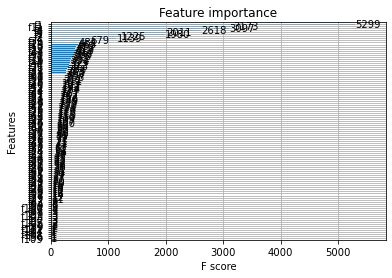

In [142]:
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(x_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)

In [44]:
best = {'colsample_bytree': 0.59, 'gamma': 0.09, 'learning_rate': 0.32, 'max_depth': 22, 'min_child_weight': 1.0, 'n_estimators': 9, 'subsample': 0.92}

In [183]:
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

cat = CatBoostRegressor(max_depth=10)
cat = cat.fit(x_train,y_train)
y_pred = cat.predict(x_test)

Learning rate set to 0.094755
0:	learn: 2697.4198646	total: 188ms	remaining: 3m 8s
1:	learn: 2583.0685933	total: 362ms	remaining: 3m
2:	learn: 2482.7503348	total: 538ms	remaining: 2m 58s
3:	learn: 2392.0352560	total: 710ms	remaining: 2m 56s
4:	learn: 2315.7878773	total: 886ms	remaining: 2m 56s
5:	learn: 2247.1340722	total: 1.07s	remaining: 2m 57s
6:	learn: 2191.0394659	total: 1.26s	remaining: 2m 58s
7:	learn: 2141.8438052	total: 1.44s	remaining: 2m 58s
8:	learn: 2098.6171672	total: 1.62s	remaining: 2m 58s
9:	learn: 2059.9582307	total: 1.8s	remaining: 2m 58s
10:	learn: 2024.5626268	total: 1.99s	remaining: 2m 59s
11:	learn: 1994.3926220	total: 2.17s	remaining: 2m 58s
12:	learn: 1961.9449031	total: 2.36s	remaining: 2m 59s
13:	learn: 1939.6888158	total: 2.56s	remaining: 3m
14:	learn: 1920.0348960	total: 2.76s	remaining: 3m 1s
15:	learn: 1896.7664238	total: 2.94s	remaining: 3m
16:	learn: 1879.3194734	total: 3.13s	remaining: 3m 1s
17:	learn: 1865.0313383	total: 3.32s	remaining: 3m 1s
18:	lea

150:	learn: 1494.3461367	total: 28s	remaining: 2m 37s
151:	learn: 1492.7832949	total: 28.2s	remaining: 2m 37s
152:	learn: 1491.7422971	total: 28.4s	remaining: 2m 37s
153:	learn: 1489.9647362	total: 28.6s	remaining: 2m 37s
154:	learn: 1489.1592478	total: 28.8s	remaining: 2m 36s
155:	learn: 1487.4561739	total: 29s	remaining: 2m 36s
156:	learn: 1485.8088849	total: 29.2s	remaining: 2m 36s
157:	learn: 1484.1889033	total: 29.3s	remaining: 2m 36s
158:	learn: 1482.9497827	total: 29.5s	remaining: 2m 36s
159:	learn: 1481.3538681	total: 29.7s	remaining: 2m 35s
160:	learn: 1480.3000984	total: 29.9s	remaining: 2m 35s
161:	learn: 1479.8086208	total: 30.1s	remaining: 2m 35s
162:	learn: 1477.7688016	total: 30.3s	remaining: 2m 35s
163:	learn: 1476.0100337	total: 30.5s	remaining: 2m 35s
164:	learn: 1475.2949514	total: 30.6s	remaining: 2m 35s
165:	learn: 1473.0255135	total: 30.8s	remaining: 2m 34s
166:	learn: 1472.2613755	total: 31s	remaining: 2m 34s
167:	learn: 1471.8586515	total: 31.2s	remaining: 2m 34

297:	learn: 1356.8652721	total: 55.7s	remaining: 2m 11s
298:	learn: 1355.8969581	total: 55.9s	remaining: 2m 11s
299:	learn: 1354.7817910	total: 56.1s	remaining: 2m 10s
300:	learn: 1353.7691000	total: 56.3s	remaining: 2m 10s
301:	learn: 1352.9682336	total: 56.5s	remaining: 2m 10s
302:	learn: 1352.2934072	total: 56.7s	remaining: 2m 10s
303:	learn: 1351.6090457	total: 56.9s	remaining: 2m 10s
304:	learn: 1351.0755928	total: 57.1s	remaining: 2m 10s
305:	learn: 1350.1650991	total: 57.3s	remaining: 2m 9s
306:	learn: 1349.4587526	total: 57.4s	remaining: 2m 9s
307:	learn: 1349.1570569	total: 57.6s	remaining: 2m 9s
308:	learn: 1348.1521555	total: 57.8s	remaining: 2m 9s
309:	learn: 1347.5087154	total: 58s	remaining: 2m 9s
310:	learn: 1346.7978517	total: 58.2s	remaining: 2m 8s
311:	learn: 1346.2037487	total: 58.3s	remaining: 2m 8s
312:	learn: 1345.7312546	total: 58.5s	remaining: 2m 8s
313:	learn: 1345.3714175	total: 58.7s	remaining: 2m 8s
314:	learn: 1345.0265852	total: 58.9s	remaining: 2m 8s
315:

445:	learn: 1270.9503530	total: 1m 23s	remaining: 1m 43s
446:	learn: 1270.1825921	total: 1m 23s	remaining: 1m 43s
447:	learn: 1269.7703540	total: 1m 23s	remaining: 1m 43s
448:	learn: 1269.1705382	total: 1m 23s	remaining: 1m 42s
449:	learn: 1268.5622071	total: 1m 23s	remaining: 1m 42s
450:	learn: 1268.3264603	total: 1m 24s	remaining: 1m 42s
451:	learn: 1267.9221806	total: 1m 24s	remaining: 1m 42s
452:	learn: 1267.3979266	total: 1m 24s	remaining: 1m 42s
453:	learn: 1266.9456742	total: 1m 24s	remaining: 1m 41s
454:	learn: 1266.6184603	total: 1m 24s	remaining: 1m 41s
455:	learn: 1266.0055508	total: 1m 25s	remaining: 1m 41s
456:	learn: 1265.6851204	total: 1m 25s	remaining: 1m 41s
457:	learn: 1265.1105143	total: 1m 25s	remaining: 1m 41s
458:	learn: 1264.5705506	total: 1m 25s	remaining: 1m 40s
459:	learn: 1264.2098367	total: 1m 25s	remaining: 1m 40s
460:	learn: 1263.7644569	total: 1m 25s	remaining: 1m 40s
461:	learn: 1262.8594988	total: 1m 26s	remaining: 1m 40s
462:	learn: 1262.0445947	total:

590:	learn: 1207.8851623	total: 1m 50s	remaining: 1m 16s
591:	learn: 1207.7629342	total: 1m 50s	remaining: 1m 16s
592:	learn: 1207.6238322	total: 1m 50s	remaining: 1m 16s
593:	learn: 1207.1378965	total: 1m 51s	remaining: 1m 15s
594:	learn: 1206.9198224	total: 1m 51s	remaining: 1m 15s
595:	learn: 1206.1269671	total: 1m 51s	remaining: 1m 15s
596:	learn: 1205.9237433	total: 1m 51s	remaining: 1m 15s
597:	learn: 1205.4140903	total: 1m 51s	remaining: 1m 15s
598:	learn: 1204.8652636	total: 1m 52s	remaining: 1m 15s
599:	learn: 1204.4510693	total: 1m 52s	remaining: 1m 14s
600:	learn: 1204.0186996	total: 1m 52s	remaining: 1m 14s
601:	learn: 1203.4095839	total: 1m 52s	remaining: 1m 14s
602:	learn: 1203.0168443	total: 1m 52s	remaining: 1m 14s
603:	learn: 1202.6689670	total: 1m 53s	remaining: 1m 14s
604:	learn: 1202.3269040	total: 1m 53s	remaining: 1m 13s
605:	learn: 1201.7792323	total: 1m 53s	remaining: 1m 13s
606:	learn: 1201.3860565	total: 1m 53s	remaining: 1m 13s
607:	learn: 1200.8898321	total:

738:	learn: 1156.1195923	total: 2m 18s	remaining: 48.8s
739:	learn: 1155.6772252	total: 2m 18s	remaining: 48.6s
740:	learn: 1155.2670602	total: 2m 18s	remaining: 48.4s
741:	learn: 1155.2301328	total: 2m 18s	remaining: 48.2s
742:	learn: 1154.8281853	total: 2m 18s	remaining: 48s
743:	learn: 1154.3704611	total: 2m 19s	remaining: 47.8s
744:	learn: 1154.0632569	total: 2m 19s	remaining: 47.6s
745:	learn: 1154.0229346	total: 2m 19s	remaining: 47.5s
746:	learn: 1153.6902417	total: 2m 19s	remaining: 47.3s
747:	learn: 1153.2902543	total: 2m 19s	remaining: 47.1s
748:	learn: 1153.0578264	total: 2m 19s	remaining: 46.9s
749:	learn: 1152.7399382	total: 2m 20s	remaining: 46.7s
750:	learn: 1152.0697792	total: 2m 20s	remaining: 46.5s
751:	learn: 1151.5721311	total: 2m 20s	remaining: 46.3s
752:	learn: 1151.4848256	total: 2m 20s	remaining: 46.1s
753:	learn: 1151.1306834	total: 2m 20s	remaining: 46s
754:	learn: 1150.9046822	total: 2m 21s	remaining: 45.8s
755:	learn: 1150.5969741	total: 2m 21s	remaining: 45

885:	learn: 1109.9024556	total: 2m 46s	remaining: 21.4s
886:	learn: 1109.6113342	total: 2m 46s	remaining: 21.2s
887:	learn: 1109.3089368	total: 2m 46s	remaining: 21s
888:	learn: 1108.8401185	total: 2m 46s	remaining: 20.8s
889:	learn: 1108.6759082	total: 2m 46s	remaining: 20.6s
890:	learn: 1108.5068637	total: 2m 46s	remaining: 20.4s
891:	learn: 1108.2891313	total: 2m 47s	remaining: 20.2s
892:	learn: 1108.0790432	total: 2m 47s	remaining: 20.1s
893:	learn: 1107.7234389	total: 2m 47s	remaining: 19.9s
894:	learn: 1107.5746845	total: 2m 47s	remaining: 19.7s
895:	learn: 1107.2315113	total: 2m 47s	remaining: 19.5s
896:	learn: 1106.8915683	total: 2m 48s	remaining: 19.3s
897:	learn: 1106.1613719	total: 2m 48s	remaining: 19.1s
898:	learn: 1106.1049655	total: 2m 48s	remaining: 18.9s
899:	learn: 1105.7653013	total: 2m 48s	remaining: 18.7s
900:	learn: 1105.4565455	total: 2m 48s	remaining: 18.6s
901:	learn: 1105.0940541	total: 2m 49s	remaining: 18.4s
902:	learn: 1104.9882881	total: 2m 49s	remaining: 

In [43]:
print("Roc_train:",metrics.roc_auc_score(y_train, cat.predict(x_train)))
print("Roc_test:",metrics.roc_auc_score(y_test, y_pred))

Roc_train: 0.9162233014964292
Roc_test: 0.8688858951757088


In [44]:
print("F1_train:",metrics.f1_score(y_train, cat.predict(x_train)))
print("F1_test:",metrics.f1_score(y_test, y_pred))

F1_train: 0.9118860961282291
F1_test: 0.8633693196083354


In [45]:
print("Gini_train:",2*metrics.roc_auc_score(y_train, cat.predict(x_train))-1)
print("Gini_test:",2*metrics.roc_auc_score(y_test, y_pred)-1)

Gini_train: 0.8324466029928583
Gini_test: 0.7377717903514176


In [46]:
print("Accuracy_train:",metrics.accuracy_score(y_train, cat.predict(x_train)))
print("Accuracy_test:",metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.9170327825032042
Accuracy_test: 0.8694546617623541


In [98]:
print("Accuracy_train:",metrics.mean_squared_error(y_train, cat.predict(x_train), squared = False))
print("Accuracy_test:",metrics.mean_squared_error(y_test, y_pred, squared = False))

Accuracy_train: 1079.5787639438906
Accuracy_test: 1040.7437145157078


In [184]:
print("Accuracy_train:",metrics.mean_absolute_error(y_train, cat.predict(x_train)))
print("Accuracy_test:",metrics.mean_absolute_error(y_test, y_pred))

Accuracy_train: 644.7470752167267
Accuracy_test: 750.1282509515946


In [45]:
df_first

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,Доставка,Id,МаржаПолная
0,2017-01-07,06.07.2017 0:00,5031788_TR,Доставлен,1634.0,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051334048,0,0,1.0,55574948-52495050484877,26.90
1,2017-01-07,06.07.2017 0:00,5031788_TR,Доставлен,1634.0,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00051367351,0,0,1.0,55574948-52495050484877,26.90
2,2017-01-07,06.07.2017 0:00,5031788_TR,Доставлен,1634.0,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00007611755,0,0,1.0,55574948-52495050484877,8.04
3,2017-01-07,06.07.2017 0:00,5031788_TR,Доставлен,1634.0,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00014478250,0,0,1.0,55574948-52495050484877,5.79
4,2017-01-07,06.07.2017 0:00,5031788_TR,Доставлен,1634.0,1 634,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,30.06.2017 0:00,55574948-52495050484877,116117_tu17@mail.ru,Татьяна,IDL00001209351,0,0,1.0,55574948-52495050484877,63.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776244,2017-12-10,16.10.2017 0:00,5775649_ES,К отгрузке,1924.0,1 924,Курьерская,Наличная,Москва,ДЕТСКОЕ ПИТАНИЕ,...,12.10.2017 0:00,55575054-56515654485370,116117_tu20@yandex.ru,Наталия,ID000sm-0611250,0,0,0.0,55575054-56515654485370,27.83
776245,2017-12-10,16.10.2017 0:00,5775649_ES,К отгрузке,1924.0,1 924,Курьерская,Наличная,Москва,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,...,12.10.2017 0:00,55575054-56515654485370,116117_tu20@yandex.ru,Наталия,IDL00018658654,0,0,0.0,55575054-56515654485370,122.00
776246,2017-12-10,15.10.2017 0:00,5775667_ES,Доставлен,1232.0,1 232,Магазины,Безналичная,Москва,ДЕТСКОЕ ПИТАНИЕ,...,12.10.2017 0:00,55574851-50565452485270,115117_su16@mail.ru,Надия,ID10009087553,0,0,0.0,55574851-50565452485270,1.11
776247,2017-12-10,15.10.2017 0:00,5775667_ES,Доставлен,1232.0,1 232,Магазины,Безналичная,Москва,ДЕТСКОЕ ПИТАНИЕ,...,12.10.2017 0:00,55574851-50565452485270,115117_su16@mail.ru,Надия,ID000sm-0705856,0,0,0.0,55574851-50565452485270,1.11


In [296]:
df_last = df_last.merge(mean_non_dupe_bought, left_on='Id', right_on='Телефон_new', how = 'left')
df_last = df_last.rename(columns={'Итог':'СреднийЧекВыкупленные'})
df_last = df_last.fillna(0)
df_last['Цель'] = df_last['СреднийЧекВыкупленные']
#display = display.drop(columns = ['Цель'])
display = display.merge(df_last[['Телефон_new', 'Цель']], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.drop(columns=['Телефон_new'])
display = display.fillna(0)
x = display.drop(columns = ['Id', 'Гео', 'Цель']).values
y = display.Цель

In [176]:
display.to_csv('display_reg.csv', sep=';', encoding='utf-8')

In [179]:
display_model['Id'].value_counts()

55574954-57485351535070    198
55574954-50565449575671    121
55574951-54554848555476    115
55574952-53485057564972    113
55574954-50494954545575    109
                          ... 
55574954-53555656505278      1
55575049-54515755555570      1
55574856-50545551505272      1
55574851-48575651525077      1
55575454-49525248554870      1
Name: Id, Length: 123877, dtype: int64

In [297]:
display

,Id,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,СВЕТООТРАЖАЮЩИЕ ЭЛЕМЕНТЫ,ВЕТАПТЕКА,ВИТАМИНЫ/БАДЫ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТОВАРЫ ДЛЯ ХОРЬКОВ,ЗЕРКАЛА,"ГЛАДИЛЬНЫЕ ДОСКИ,СУШИЛКИ",ТЕХНИКА ДЛЯ ДОМА,Гео,Цель
0,55574948-52495050484877,1,1634.0,1.000,1585.0,13,38.249231,1.0,1585.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва,0.0
1,55575656-49565651494970,1,1915.0,1.000,1816.0,11,-0.941818,1.0,1816.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы,0.0
2,55575155-54535648525672,4,15147.0,1.000,85842.0,11,2365.939091,3.0,17498.0,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы,0.0
3,55575456-55545450525776,2,2782.0,1.125,5264.0,9,192.295000,2.0,2632.0,1.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва,0.0
4,55575054-54575350505479,3,599.0,1.000,1650.0,5,76.240000,1.0,310.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208426,55574954-52495355555471,1,6453.0,1.000,6453.0,7,222.321429,1.0,1018.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва,0.0
208427,55575649-57495654575771,1,578.0,1.000,479.0,2,19.640000,1.0,479.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы,0.0
208428,55575048-54515157545679,1,1058.0,1.000,909.0,1,435.070000,1.0,909.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Регионы,0.0
208429,55575054-56575557485677,1,1059.0,1.000,1059.0,1,41.480000,1.0,1059.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Москва,1059.0


In [298]:
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [110]:
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = XGBRegressor(max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(x_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)

CrossValMean:                                                                                                          
0.6625582307251258                                                                                                     
CrossValMean:                                                                                                          
0.7540986063288968                                                                                                     
CrossValMean:                                                                                                          
0.7181952112416576                                                                                                     
CrossValMean:                                                                                                          
0.7977093440931213                                                                                                     
CrossValMean:                           

In [235]:
x_train

array([[-6.07616444e-01, -4.89377938e-01, -1.91219916e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04],
       [-6.07616444e-01,  3.70442106e-01, -5.65553734e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04],
       [ 7.62372973e-02, -5.77834405e-01, -3.81670455e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04],
       ...,
       [ 7.60091038e-01, -8.62281195e-01, -5.65553734e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04],
       [ 1.10201791e+00, -5.00544432e-01,  7.37390643e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04],
       [-2.65689573e-01, -6.00914528e-01, -5.65553734e-01, ...,
         0.00000000e+00, -7.42035802e-04, -7.42035802e-04]])

In [236]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

best = {'colsample_bytree': 0.12, 'gamma': 0.01, 'learning_rate': 0.09, 'max_depth': 23, 'min_child_weight': 2.0, 'subsample': 0.98}
xgb = xgboost.XGBRegressor(**best)
xgb = xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

XGBoostError: bad allocation

In [42]:
print("Roc_train:",metrics.roc_auc_score(y_train, xgb.predict(x_train)))
print("Roc_test:",metrics.roc_auc_score(y_test, y_pred))

Roc_train: 0.997502720305105
Roc_test: 0.9661699966379124


In [43]:
print("F1_train:",metrics.f1_score(y_train, xgb.predict(x_train)))
print("F1_test:",metrics.f1_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print("Gini_train:",2*metrics.roc_auc_score(y_train, xgb.predict(x_train))-1)
print("Gini_test:",2*metrics.roc_auc_score(y_test, y_pred)-1)

In [94]:
print("Accuracy_train:",metrics.mean_squared_error(y_train, xgb.predict(x_train), squared = True))
print("Accuracy_test:",metrics.mean_squared_error(y_test, y_pred, squared = True))

Accuracy_train: 227797.29215518502
Accuracy_test: 1083147.479303953


In [181]:
print("Accuracy_train:",metrics.mean_absolute_error(y_train, xgb.predict(x_train)))
print("Accuracy_test:",metrics.mean_absolute_error(y_test, y_pred))

Accuracy_train: 219.9167017890073
Accuracy_test: 447.5049725533524


In [96]:
x_train.shape

(145901, 127)